In [109]:
#!pip install -q gdown
#import gdown

#gdown.download("https://drive.google.com/uc?id=1y8BNS7yVGuMxOFKBqpy4h-F42W4IyNBz", "train.csv", fuzzy=True)


In [1]:
import pandas as pd

file_path = r"C:\Users\91788\Downloads\optiver-trading-at-the-close\train.csv"

# Load the dataset
df = pd.read_csv(file_path)
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [3]:
df['seconds_in_bucket'].sort_values().unique()


array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540], dtype=int64)

## Basic Checks

In [132]:
# Shape, missing values, types
print(df.shape)
print(df.info())
print(df.describe())

(5237980, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB
None
           stock_id       date_id  seconds_in_bucket  imbalance_size  \
count  5.

In [134]:
missing_counts = df.isnull().sum()
print("Missing values:\n", missing_counts)

Missing values:
 stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


In [136]:
df[df['wap'].isnull()].groupby('stock_id').size().sort_values(ascending=False)

stock_id
19     55
101    55
131    55
158    55
dtype: int64

In [10]:
# Step 1: Sort the DataFrame
df = df.sort_values(by=['stock_id', 'date_id', 'seconds_in_bucket'])

# Step 2: Assign a local row number per group
df['row_num'] = df.groupby(['stock_id', 'date_id']).cumcount()

In [11]:
missing = df[df['wap'].isnull()]
print(missing[['stock_id', 'date_id', 'seconds_in_bucket', 'row_num']])

         stock_id  date_id  seconds_in_bucket  row_num
4764999        19      438                  0        0
4765199        19      438                 10        1
4765399        19      438                 20        2
4765599        19      438                 30        3
4765799        19      438                 40        4
...           ...      ...                ...      ...
4225138       158      388                500       50
4225338       158      388                510       51
4225538       158      388                520       52
4225738       158      388                530       53
4225938       158      388                540       54

[220 rows x 4 columns]


In [14]:
# Save the dataframe with row_num included to a CSV
#output_path = r"C:\Users\91788\Downloads\optiver-trading-at-the-close\Missing_values.csv"
#missing.to_csv(output_path, index=False)

#output_path

In [16]:
df[df['stock_id']==19].count()

stock_id                   26455
date_id                    26455
seconds_in_bucket          26455
imbalance_size             26400
imbalance_buy_sell_flag    26455
reference_price            26400
matched_size               26400
far_price                  11749
near_price                 12000
bid_price                  26400
bid_size                   26455
ask_price                  26400
ask_size                   26455
wap                        26400
target                     26454
time_id                    26455
row_id                     26455
row_num                    26455
dtype: int64

In [103]:
print("Unique stock_ids:", df['stock_id'].nunique())
print("Unique date_ids:", df['date_id'].nunique())
print("Seconds in bucket range:", df['seconds_in_bucket'].min(), "-", df['seconds_in_bucket'].max())

Unique stock_ids: 200
Unique date_ids: 481
Seconds in bucket range: 0 - 540


In [105]:
#df['wap_was_missing'] = df['wap'].isnull().astype(int)

In [107]:
df['stock_id'].sum()

520071475

## Remove Nulls - Target (88 values) and Wap(220 Values)

In [5]:
df = df.dropna(subset=['target'])

In [7]:
df = df.dropna(subset=['wap'])

## EDA

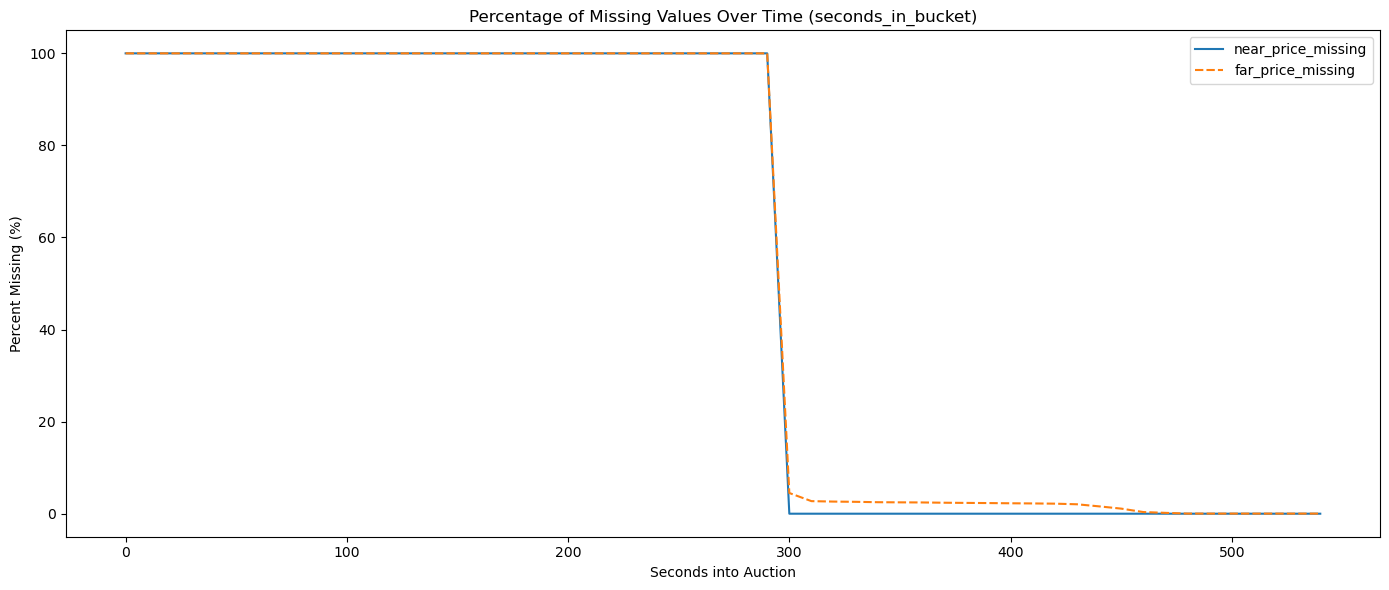

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a flag for missing values
df['near_price_missing'] = df['near_price'].isnull().astype(int)
df['far_price_missing'] = df['far_price'].isnull().astype(int)

# Group by seconds_in_bucket to see if missingness is time-driven (cyclic)
missing_by_time = df.groupby('seconds_in_bucket')[['near_price_missing', 'far_price_missing']].mean() * 100

# Plotting missingness pattern
plt.figure(figsize=(14, 6))
sns.lineplot(data=missing_by_time)
plt.title("Percentage of Missing Values Over Time (seconds_in_bucket)")
plt.xlabel("Seconds into Auction")
plt.ylabel("Percent Missing (%)")
plt.grid(False)
plt.tight_layout()
plt.show()


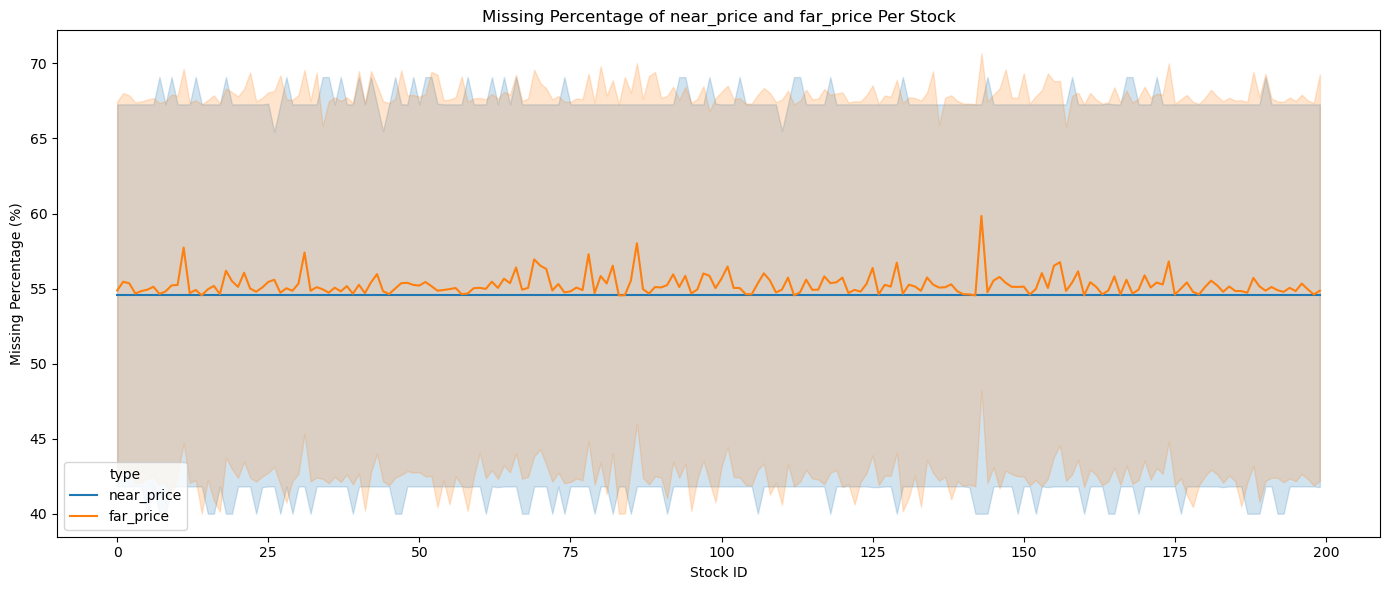

In [127]:
import pandas as pd

# Create binary flags for missing near_price and far_price
df['near_price_missing'] = df['near_price'].isnull().astype(int)
df['far_price_missing'] = df['far_price'].isnull().astype(int)

# Group by seconds_in_bucket and stock_id to examine missingness trends across time and stocks
near_missing_pct = df.groupby(['stock_id', 'seconds_in_bucket'])['near_price_missing'].mean().unstack() * 100
far_missing_pct = df.groupby(['stock_id', 'seconds_in_bucket'])['far_price_missing'].mean().unstack() * 100

# Melt near and far missing percentages to long format
near_melt = near_missing_pct.reset_index().melt(id_vars='stock_id', var_name='seconds_in_bucket', value_name='missing_pct')
near_melt['type'] = 'near_price'

far_melt = far_missing_pct.reset_index().melt(id_vars='stock_id', var_name='seconds_in_bucket', value_name='missing_pct')
far_melt['type'] = 'far_price'

# Combine both
missing_long = pd.concat([near_melt, far_melt])

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=missing_long, x='stock_id', y='missing_pct', hue='type')
plt.title("Missing Percentage of near_price and far_price Per Stock")
plt.xlabel("Stock ID")
plt.ylabel("Missing Percentage (%)")
plt.grid(False)
plt.tight_layout()
plt.show()


In [128]:
# Calculate average missing % per stock
avg_near = near_missing_pct.mean(axis=1)
avg_far = far_missing_pct.mean(axis=1)

# Combine into a DataFrame
missing_summary = pd.DataFrame({
    'stock_id': avg_near.index,
    'near_price_missing_pct': avg_near.values,
    'far_price_missing_pct': avg_far.values
})

# Top 10 stocks with highest far_price missing %
top_10_far_missing = missing_summary.sort_values(by='far_price_missing_pct', ascending=False).head(10)

top_10_far_missing

,stock_id,near_price_missing_pct,far_price_missing_pct
143,143,54.545455,59.837460
86,86,54.545455,58.019278
11,11,54.545455,57.731998
31,31,54.545455,57.403137
78,78,54.545455,57.289880
69,69,54.545455,56.945127
174,174,54.545455,56.809677
156,156,54.545455,56.756757
129,129,54.545455,56.730297
70,70,54.545455,56.529957


In [129]:
tail_10_far_missing = missing_summary.sort_values(by='far_price_missing_pct', ascending=False).tail(10)
tail_10_far_missing

,stock_id,near_price_missing_pct,far_price_missing_pct
179,179,54.545455,54.609715
151,151,54.545455,54.605935
198,198,54.545455,54.605935
175,175,54.545455,54.594595
84,84,54.545455,54.560575
160,160,54.545455,54.549235
14,14,54.545455,54.549235
142,142,54.545455,54.549235
112,112,54.545455,54.549235
83,83,54.545455,54.545455


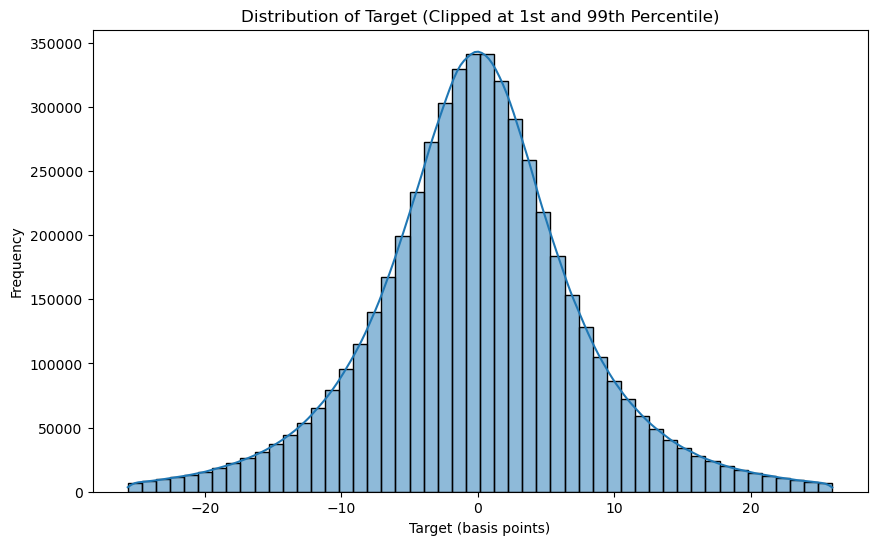

In [130]:
# Clip extreme outliers at 1st and 99th percentile
q_low, q_high = df['target'].quantile([0.01, 0.99])
filtered = df[(df['target'] >= q_low) & (df['target'] <= q_high)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered['target'], kde=True, bins=50)
plt.title("Distribution of Target (Clipped at 1st and 99th Percentile)")
plt.xlabel("Target (basis points)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

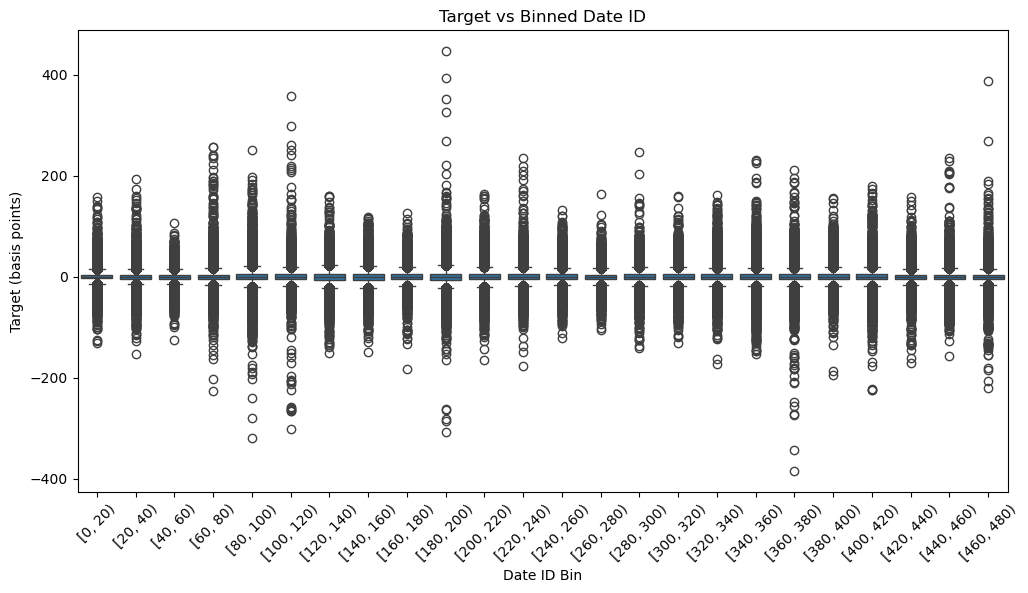

In [131]:
# Bin date_id into intervals of 20
df['date_bin'] = pd.cut(df['date_id'], bins=range(0, df['date_id'].max()+20, 20), right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='date_bin', y='target', data=df)
plt.title("Target vs Binned Date ID")
plt.xlabel("Date ID Bin")
plt.ylabel("Target (basis points)")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

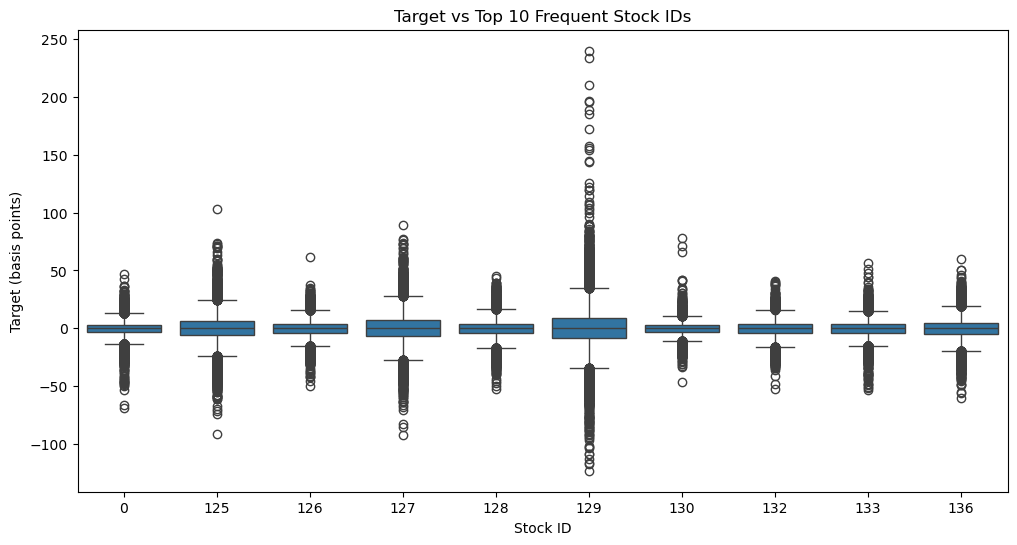

In [132]:
# Plot 4: Target vs Top 10 Frequent Stock IDs
top_stocks = df['stock_id'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(x='stock_id', y='target', data=df[df['stock_id'].isin(top_stocks)])
plt.title("Target vs Top 10 Frequent Stock IDs")
plt.xlabel("Stock ID")
plt.ylabel("Target (basis points)")
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


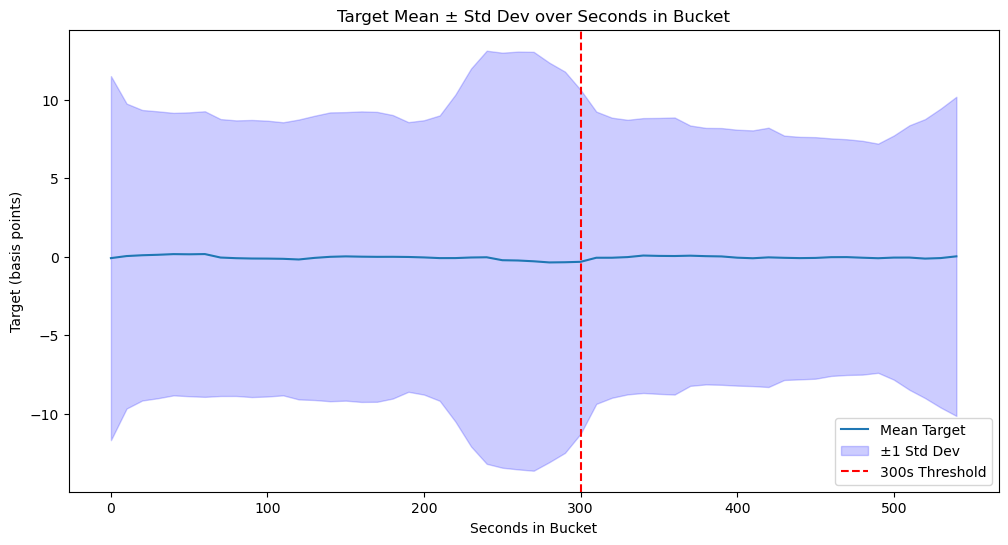

In [133]:
# Group by seconds_in_bucket and calculate mean and std of target
target_stats = df.groupby('seconds_in_bucket')['target'].agg(['mean', 'std']).reset_index()

# Plot mean ± std over time
plt.figure(figsize=(12, 6))
plt.plot(target_stats['seconds_in_bucket'], target_stats['mean'], label='Mean Target')
plt.fill_between(
    target_stats['seconds_in_bucket'],
    target_stats['mean'] - target_stats['std'],
    target_stats['mean'] + target_stats['std'],
    color='blue',
    alpha=0.2,
    label='±1 Std Dev'
)
plt.axvline(x=300, color='red', linestyle='--', label='300s Threshold')
plt.title("Target Mean ± Std Dev over Seconds in Bucket")
plt.xlabel("Seconds in Bucket")
plt.ylabel("Target (basis points)")
plt.legend()
plt.grid(False)
plt.show()

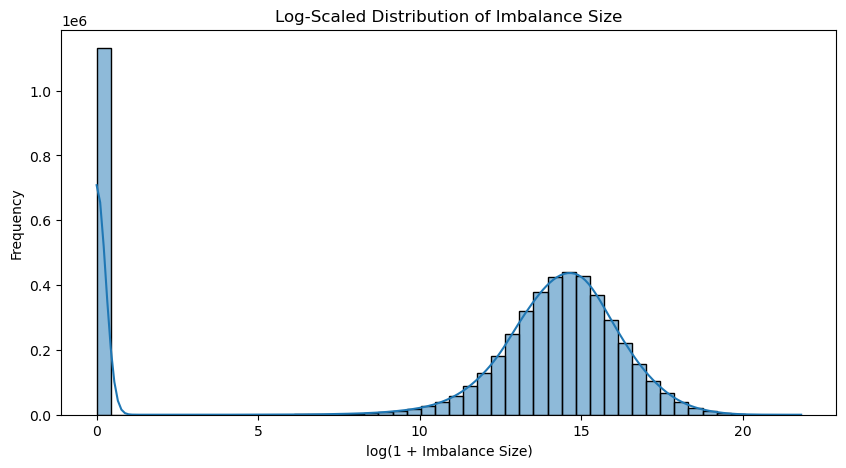

In [134]:
# Add 1 to avoid log(0)
import numpy as np
df['log_imbalance_size'] = np.log1p(df['imbalance_size'])

plt.figure(figsize=(10, 5))
sns.histplot(df['log_imbalance_size'], bins=50, kde=True)
plt.title("Log-Scaled Distribution of Imbalance Size")
plt.xlabel("log(1 + Imbalance Size)")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


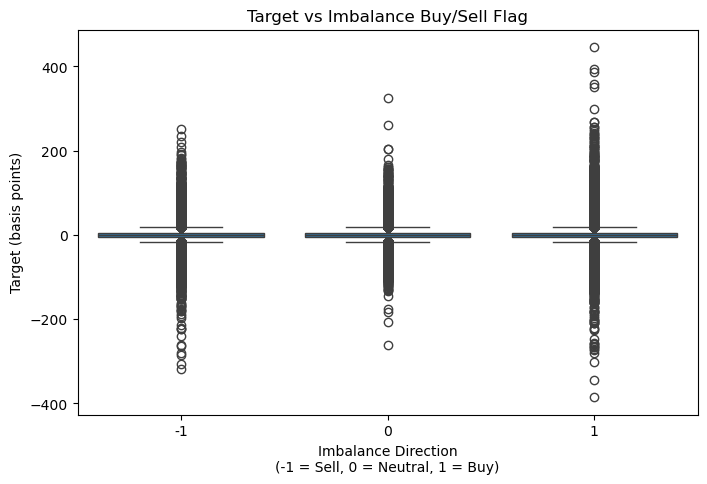

In [135]:
# Plot: Target vs Imbalance Buy/Sell Flag
plt.figure(figsize=(8, 5))
sns.boxplot(x='imbalance_buy_sell_flag', y='target', data=df)
plt.title("Target vs Imbalance Buy/Sell Flag")
plt.xlabel("Imbalance Direction\n(-1 = Sell, 0 = Neutral, 1 = Buy)")
plt.ylabel("Target (basis points)")
plt.grid(False)
plt.show()

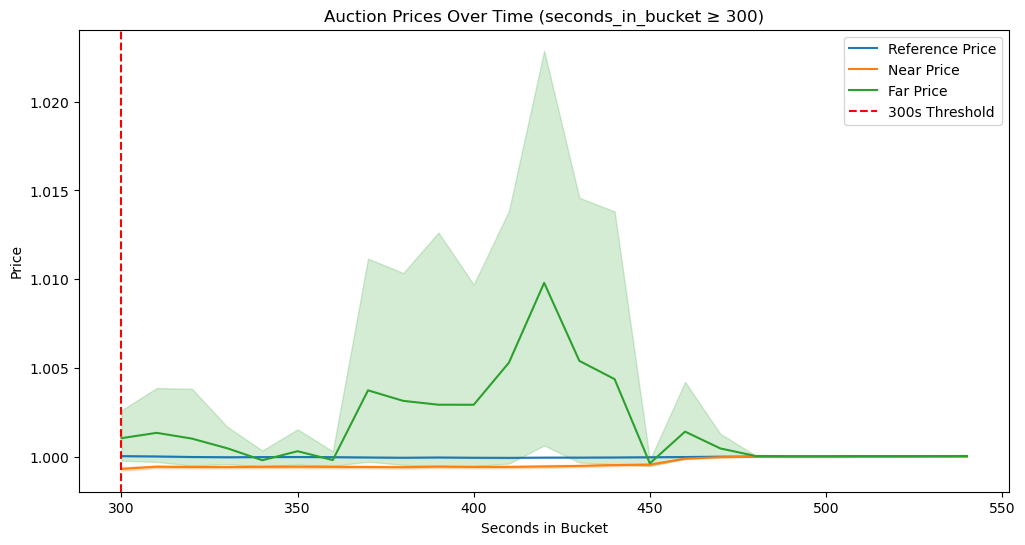

In [136]:
# Filter only rows where all auction prices are available
df_prices = df[['seconds_in_bucket', 'reference_price', 'near_price', 'far_price']].dropna()

# Plot the three auction prices over seconds_in_bucket
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_prices, x='seconds_in_bucket', y='reference_price', label='Reference Price')
sns.lineplot(data=df_prices, x='seconds_in_bucket', y='near_price', label='Near Price')
sns.lineplot(data=df_prices, x='seconds_in_bucket', y='far_price', label='Far Price')
plt.axvline(x=300, color='red', linestyle='--', label='300s Threshold')
plt.title("Auction Prices Over Time (seconds_in_bucket ≥ 300)")
plt.xlabel("Seconds in Bucket")
plt.ylabel("Price")
plt.legend()
plt.grid(False)
plt.show()

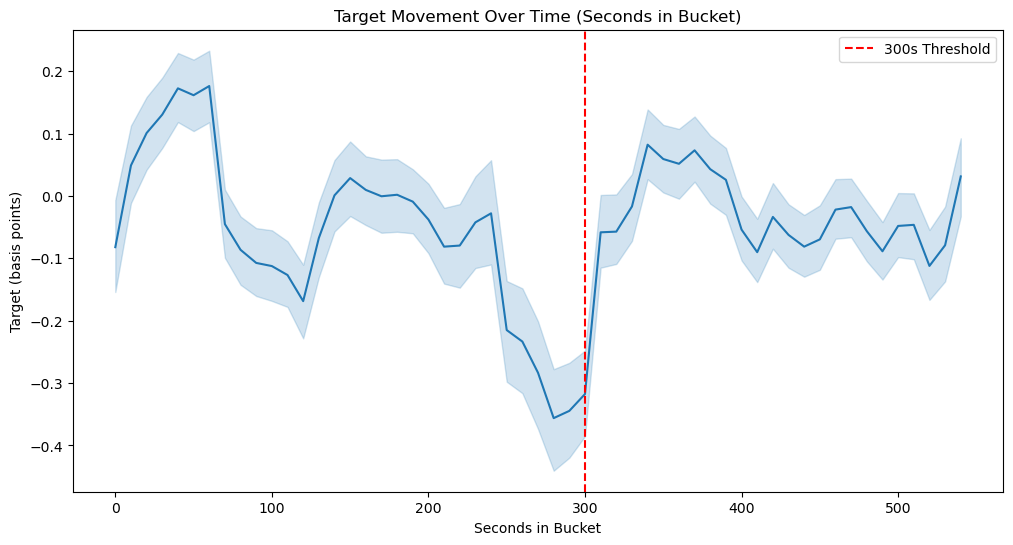

In [137]:
# Plot target over seconds_in_bucket (mean only, no aggregation to preserve time structure)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='seconds_in_bucket', y='target')
plt.axvline(x=300, color='red', linestyle='--', label='300s Threshold')
plt.title("Target Movement Over Time (Seconds in Bucket)")
plt.xlabel("Seconds in Bucket")
plt.ylabel("Target (basis points)")
plt.grid(False)
plt.legend()
plt.show()

In [138]:
df[['far_price', 'near_price', 'reference_price']].isnull().sum()

far_price          2894122
near_price         2856960
reference_price          0
dtype: int64

In [139]:
(df['far_price'] < df['near_price']).sum()

686071

In [140]:
(df['far_price'].isnull() | df['near_price'].isnull()).sum()

2894122

In [141]:
df.loc[df['far_price'] < df['near_price'], 'imbalance_buy_sell_flag'].value_counts()

imbalance_buy_sell_flag
-1    686018
 0        53
Name: count, dtype: int64

In [142]:
df[df['far_price'] < df['near_price']][['far_price', 'near_price', 'bid_price', 'ask_price', 'imbalance_buy_sell_flag']].sample(5)

,far_price,near_price,bid_price,ask_price,imbalance_buy_sell_flag
2926834,0.970761,0.995523,0.996297,0.996877,-1
1216055,0.992986,0.994556,0.998984,0.999047,-1
1403155,0.998965,0.999299,1.000635,1.000858,-1
613740,1.001345,1.002213,1.002213,1.003081,-1
4840470,0.997452,0.998264,0.998781,0.999224,-1


In [114]:
df.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                   0
imbalance_buy_sell_flag          0
reference_price                  0
matched_size                     0
far_price                  2894122
near_price                 2856960
bid_price                        0
bid_size                         0
ask_price                        0
ask_size                         0
wap                              0
target                           0
time_id                          0
row_id                           0
dtype: int64

## Feature Engineering

## Use these feature enginerring for tree based models

### Stable, time-invariant features

In [145]:
# # STEP 1: Core Base Features (Always Available)

# # 1. Weighted Average Price (WAP)
# df['wap'] = (df['bid_price'] * df['ask_size'] + df['ask_price'] * df['bid_size']) / (df['bid_size'] + df['ask_size'])

# # 2. Price Spread and its Percentage
# df['price_spread'] = df['ask_price'] - df['bid_price']
# df['spread_pct'] = df['price_spread'] / df['wap']

# # 3. Order Imbalance Features
# df['order_imbalance'] = df['ask_size'] - df['bid_size']
# df['orderbook_skew'] = df['bid_size'] / (df['bid_size'] + df['ask_size'])
# df['signed_imbalance'] = df['imbalance_size'] * df['imbalance_buy_sell_flag']

# # 4. Relative Time (from 0 to 1)
# df['relative_time'] = df['seconds_in_bucket'] / 540

### Auction-Specific Features

In [147]:
# # STEP 2: Auction-Specific Features (valid only for seconds_in_bucket >= 300)

# # 1. Late auction flag
# df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)

# # 2. Auction-related spreads
# df['delta_wap_to_near'] = df['near_price'] - df['wap']
# df['near_far_spread'] = df['near_price'] - df['far_price']
# df['auction_divergence'] = df['near_price'] - df['reference_price']
# df['imbalance_ratio'] = df['imbalance_size'] / (df['matched_size'] + 1e-5)  # Avoid divide-by-zero

# # 3. Optional masking (zero out auction-based features before 300s)
# auction_cols = ['delta_wap_to_near', 'near_far_spread', 'auction_divergence', 'imbalance_ratio']
# df.loc[df['is_late_auction'] == 0, auction_cols] = 0  # You can use np.nan if you prefer masking

### Time-Series Features

In [149]:
# # STEP 3: Time-Series Features (per stock_id + time_id)

# df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])

# group = df.groupby(['stock_id', 'date_id'])

# # Lag features
# df['lag1_wap'] = group['wap'].shift(1)
# df['lag1_imbalance'] = group['order_imbalance'].shift(1)

# # Deltas
# df['wap_diff'] = df['wap'] - df['lag1_wap']
# df['imbalance_diff'] = df['order_imbalance'] - df['lag1_imbalance']

# # Rolling window features (5 seconds)
# df['rolling_wap_std_5'] = group['wap'].rolling(window=5, min_periods=1).std().reset_index(level=[0,1], drop=True)
# df['rolling_spread_mean_5'] = group['price_spread'].rolling(window=5, min_periods=1).mean().reset_index(level=[0,1], drop=True)

# # Z-score features
# rolling_mean_wap = group['wap'].transform(lambda x: x.rolling(5, min_periods=1).mean())
# rolling_std_wap = group['wap'].transform(lambda x: x.rolling(5, min_periods=1).std())
# df['zscore_wap'] = (df['wap'] - rolling_mean_wap) / (rolling_std_wap + 1e-5)

# rolling_mean_spread = group['price_spread'].transform(lambda x: x.rolling(5, min_periods=1).mean())
# rolling_std_spread = group['price_spread'].transform(lambda x: x.rolling(5, min_periods=1).std())
# df['zscore_spread'] = (df['price_spread'] - rolling_mean_spread) / (rolling_std_spread + 1e-5)

# # Past 60-second return (can't use for training target, but useful as feature)
# #df['lag60_wap'] = group['wap'].shift(60)
# #df['past_60s_return'] = (df['wap'] - df['lag60_wap']) / (df['lag60_wap'] + 1e-5)

#### Save the data as pickle 

In [151]:
# import os

# output_path = r"C:/Users/91788/Downloads/optiver-trading-at-the-close/Pickle_files"
# os.makedirs(output_path, exist_ok=True)

# df.to_pickle(os.path.join(output_path, "optiver_processed_features.pkl"))


#### Read Pickle file

In [153]:
# import pandas as pd

# df = pd.read_pickle(r"C:\Users\91788\Downloads\optiver-trading-at-the-close\Pickle_files\optiver_processed_features.pkl")


#### Basic checks

In [161]:
# # List of engineered feature columns
# feature_cols = [
#     'wap', 'price_spread', 'spread_pct',
#     'order_imbalance', 'orderbook_skew', 'signed_imbalance',
#     'relative_time',
#     'lag1_wap', 'lag1_imbalance',
#     'wap_diff', 'imbalance_diff',
#     'rolling_wap_std_5', 'rolling_spread_mean_5',
#     'zscore_wap', 'zscore_spread',
#     'delta_wap_to_near', 'near_far_spread',
#     'auction_divergence', 'imbalance_ratio'
# ]

# # Drop rows with missing target
# df_corr = df[df['target'].notnull()]

# # Correlation matrix
# corr_matrix = df_corr[feature_cols + ['target']].corr()

# # Correlation with target
# target_corr = corr_matrix['target'].sort_values(ascending=False)

# # Display top correlations
# print("Top feature correlations with target:\n")
# print(target_corr)

Top feature correlations with target:

target                   1.000000
order_imbalance          0.027090
signed_imbalance         0.017415
imbalance_diff           0.015238
delta_wap_to_near        0.013236
auction_divergence       0.011466
lag1_imbalance           0.008590
rolling_wap_std_5        0.008008
imbalance_ratio          0.005489
rolling_spread_mean_5    0.003315
spread_pct               0.002619
price_spread             0.002394
near_far_spread          0.001058
zscore_spread           -0.001492
relative_time           -0.002207
lag1_wap                -0.023356
wap                     -0.035165
zscore_wap              -0.048840
wap_diff                -0.063992
orderbook_skew          -0.114616
Name: target, dtype: float64


####  Core Features

| Feature               | Why it’s Core                                               |
|-----------------------|-------------------------------------------------------------|
| `order_imbalance`     | Most predictive — reflects real-time pressure              |
| `signed_imbalance`    | Adds direction to pressure                                 |
| `imbalance_diff`      | Captures pressure change (momentum)                        |
| `delta_wap_to_near`   | Auction vs. market tension                                 |
| `auction_divergence`  | Near vs. reference signal                                  |
| `wap_diff`            | Captures short-term price swing                            |
| `zscore_wap`          | Mean-reversion tendencies                                  |
| `orderbook_skew`      | Most negatively correlated — strong reversal signal        |

---

####  Features to Consider Dropping

| Feature            | Why Consider Dropping                                          |
|--------------------|----------------------------------------------------------------|
| `price_spread`     | Very low correlation with target                               |
| `spread_pct`       | Adds minimal new information beyond `price_spread`             |
| `near_far_spread`  | Barely any signal; often redundant with auction features       |
| `zscore_spread`    | Weak signal, potentially collinear with other volatility flags |

---

#### Experimental Feature

rolling_wap_std_5

imbalance_ratio

rolling_spread_mean_5

relative_time

lag1_wap, lag1_imbalance


In [206]:
# df['date_id'].nunique()

481

#### Model data spliting and implementation 

### 2 phase approach:

In [211]:
# # Drop rows with NaNs from important lag/rolling features
# df = df.dropna(subset=[
#     'lag1_wap', 'lag1_imbalance',
#     'wap_diff', 'imbalance_diff',
#     'rolling_wap_std_5', 'rolling_spread_mean_5',
#     'zscore_wap', 'zscore_spread'
# ])

# # Split into early and late auction sets
# df_early = df[df['is_late_auction'] == 0].copy()
# df_late = df[df['is_late_auction'] == 1].copy()

# # Define early feature set (no auction price info)
# early_features = [
#     'wap', 'order_imbalance', 'signed_imbalance',
#     'lag1_wap', 'lag1_imbalance',
#     'wap_diff', 'imbalance_diff',
#     'rolling_wap_std_5', 'rolling_spread_mean_5',
#     'zscore_wap', 'orderbook_skew'
# ]

# # Define late feature set (auction signals allowed)
# late_features = early_features + [
#     'delta_wap_to_near', 'auction_divergence'
# ]

# # Prepare model inputs
# X_early = df_early[early_features]
# y_early = df_early['target']
# groups_early = df_early['date_id']

# X_late = df_late[late_features]
# y_late = df_late['target']
# groups_late = df_late['date_id']


In [213]:
# from sklearn.model_selection import GroupKFold
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {
#     'num_leaves': [15, 31],
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [-1, 5],
#     'n_estimators': [100, 200],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8]
# }


# Feature enginerring for Neural Networks

#### For testing, I’m setting near_price and far_price to 0 for seconds_in_bucket < 300.
This is intentional: those values are systematically unavailable during the early auction window.

By doing this:

- The model can learn this behavior through associated indicator flags
- Downstream features dependent on these columns will remain numerically stable
- The model will be encouraged to infer feature relevance conditionally, based on auction phase

In [9]:
# Fill zeros only for first 300 seconds
df.loc[df['seconds_in_bucket'] < 300, 'near_price'] = 0
df.loc[df['seconds_in_bucket'] < 300, 'far_price'] = 0

df['far_price'] = df['far_price'].fillna(0)
# after fill 0 for the first 300 seconds for far price still I got 37162 nulls which are less, so I am filling those values as 0 for the first run

# (Optional) Add missingness flags
df['near_price_missing'] = (df['near_price'] == 0).astype(int)
df['far_price_missing'] = (df['far_price'] == 0).astype(int)


In [11]:
# PRICE & LIQUIDITY
df['price_spread'] = df['ask_price'] - df['bid_price']                     # liquidity tightness
df['mid_price'] = (df['ask_price'] + df['bid_price']) / 2                 # reference-like midpoint
df['spread_pct'] = df['price_spread'] / (df['wap'] + 1e-6)                # normalized spread

# SIZE & PRESSURE
df['orderbook_skew'] = df['bid_size'] / (df['bid_size'] + df['ask_size'] + 1e-6)  # buy-side pressure
df['signed_imbalance'] = df['imbalance_size'] * df['imbalance_buy_sell_flag']     # directional pressure
df['imbalance_ratio'] = df['imbalance_size'] / (df['matched_size'] + 1e-6)        # imbalance intensity

# TEMPORAL CONTEXT
df['relative_time'] = df['seconds_in_bucket'] / 540
df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)

# AUCTION VS MARKET DIVERGENCE
df['delta_wap_near'] = df['near_price'] - df['wap']
df['delta_near_far'] = df['near_price'] - df['far_price']
df['auction_deviation'] = df['near_price'] - df['reference_price']

In [13]:
df['mean_bid_size_per_day'] = df.groupby(['stock_id', 'date_id'])['bid_size'].transform('mean')
df['volatility_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('std')


In [15]:
# Daily average ask size (for supply strength)
df['mean_ask_size_day'] = df.groupby(['stock_id', 'date_id'])['ask_size'].transform('mean')

# Daily WAP mean and std (volatility and average price level)
df['mean_wap_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('mean')
df['std_wap_day'] = df.groupby(['stock_id', 'date_id'])['wap'].transform('std')

# Daily imbalance pressure
df['mean_signed_imbalance_day'] = df.groupby(['stock_id', 'date_id'])['signed_imbalance'].transform('mean')

# Daily orderbook skew
df['mean_orderbook_skew_day'] = df.groupby(['stock_id', 'date_id'])['orderbook_skew'].transform('mean')


In [17]:
df['wap_change'] = df.groupby(['stock_id', 'date_id'])['wap'].transform(lambda x: x - x.iloc[0])
df['wap_pct_change'] = df['wap_change'] / (df.groupby(['stock_id', 'date_id'])['wap'].transform('first') + 1e-6)


In [19]:
df['time_bucket'] = pd.cut(
    df['seconds_in_bucket'],
    bins=[0, 180, 360, 541],   # use 541 to include 540
    labels=[0, 1, 2],
    right=False                # makes 540 fall into final bin
).cat.codes

In [21]:
stock_avg_wap = df.groupby('stock_id')['wap'].transform('mean')
df['wap_zscore_across_dates'] = (df['wap'] - stock_avg_wap) / (df.groupby('stock_id')['wap'].transform('std') + 1e-6)


In [23]:
group = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket']).groupby(['stock_id', 'date_id'])

# Short-term (30s trend)
df['rolling_std_wap_3'] = group['wap'].rolling(window=3, min_periods=1).std().reset_index(level=[0,1], drop=True)
df['rolling_mean_wap_3'] = group['wap'].rolling(window=3, min_periods=1).mean().reset_index(level=[0,1], drop=True)
df['rolling_mean_imbalance_3'] = group['signed_imbalance'].rolling(window=3, min_periods=1).mean().reset_index(level=[0,1], drop=True)


In [24]:
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])
group = df.groupby(['stock_id', 'date_id'])

df['rolling_std_far_price_10'] = group['far_price'].rolling(window=10, min_periods=1).std().reset_index(level=[0,1], drop=True)


In [25]:
df['far_minus_reference'] = df['far_price'] - df['reference_price']
df['far_pct_dev'] = df['far_minus_reference'] / (df['reference_price'] + 1e-6)


In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = df.fillna(0)

# Step 1: Sort the DataFrame by stock, date, and time
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])

# Step 2: Define features to include in model
feature_cols = [
    'wap', 'price_spread', 'mid_price', 'spread_pct',
    'orderbook_skew', 'signed_imbalance', 'imbalance_ratio',
    'relative_time', 'is_late_auction',
    'delta_wap_near', 'delta_near_far', 'auction_deviation',
    'mean_bid_size_per_day', 'volatility_day', 'mean_ask_size_day',
    'mean_wap_day', 'std_wap_day', 'mean_signed_imbalance_day',
    'mean_orderbook_skew_day', 'wap_change', 'wap_pct_change',
    'time_bucket', 'rolling_std_wap_5', 'rolling_mean_wap_5',
    'rolling_mean_imbalance_5', 'rolling_mean_spread_5',
    'rolling_std_far_price_5', 'far_minus_reference', 'far_pct_dev'
]

# Sanitize feature list before normalization
feature_cols = [col for col in feature_cols if col in df.columns]

# Now normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])


# Step 4: Group and reshape features and targets for RNN input
session_features = df.groupby(['stock_id', 'date_id'])[feature_cols].apply(lambda x: x.values).tolist()
session_targets = df.groupby(['stock_id', 'date_id'])['target'].apply(lambda x: x.values).tolist()

# Step 5: Convert to NumPy arrays
X = np.array(session_features)   # shape: (num_sessions, 541, n_features)
y = np.array(session_targets)    # shape: (num_sessions, 541)

# Optional: Print shapes to confirm
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (95232, 55, 24)
y shape: (95232, 55)


In [31]:
import numpy as np
import pandas as pd

# 1. Define your session-level DataFrame from the main df
session_df = df[['stock_id', 'date_id']].drop_duplicates().reset_index(drop=True)

# 2. Create time-based train/test split
unique_dates = sorted(df['date_id'].unique())
cutoff = int(len(unique_dates) * 0.8)
train_dates = unique_dates[:cutoff]
test_dates = unique_dates[cutoff:]

# 3. Create boolean mask for training vs test sessions
mask = session_df['date_id'].isin(train_dates)

# 4. Apply mask to X and y
X_train = X[mask.values]
X_test = X[~mask.values]

# 5. Sequence-to-One: extract only the final target value at each session
y_train = y[mask.values][:, -1]
y_test = y[~mask.values][:, -1]

# 6. Print shapes to confirm
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (75834, 55, 24)
y_train: (75834,)
X_test: (19398, 55, 24)
y_test: (19398,)


75,834 training sessions

19,398 testing sessions

55 time steps per session (from 0s to 540s in 10s intervals)

24 features per time step

## Base model results with no optimization - GRU

C:\Users\91788\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - loss: 6.9454 - val_loss: 6.0094
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 6.8601 - val_loss: 5.9737
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 6.8054 - val_loss: 5.9501
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 6.8389 - val_loss: 5.9294
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 6.7512 - val_loss: 5.8900
2370/2370 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Final Train MAE: 6.7356 | RMSE: 10.0175
Final Test  MAE: 5.8900 | RMSE: 9.4054

Epoch-wise MAE:
Epoch 1: Train MAE = 6.9113, Val MAE = 6.0094
Epoch 2: Train MAE = 6.8553, Val MAE = 5.9737
Epoch 3: Train MAE = 6.8142, Val MAE = 5.9501
Epoch 4: Train MAE = 6.7850, Val MAE = 5.9294
Epoch 5: Train MAE = 6.7560, Val MAE = 5.8900


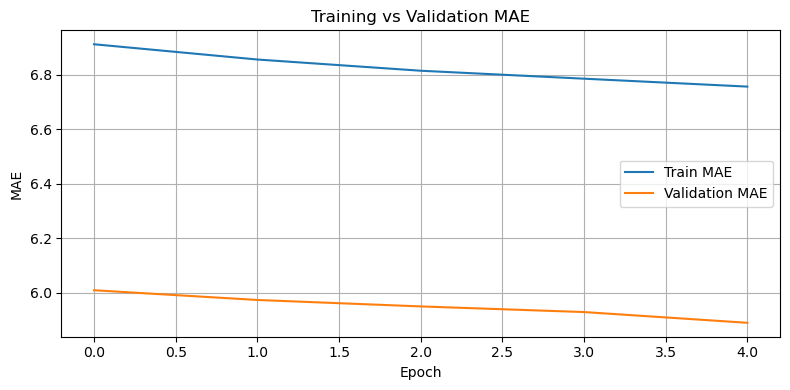

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import tqdm

# 1. Define the GRU model
model = Sequential([
    GRU(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# 2. Compile the model with MAE
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# 3. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=256,
    verbose=1
)

# 4. Final evaluation on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nFinal Train MAE: {train_mae:.4f} | RMSE: {train_rmse:.4f}")
print(f"Final Test  MAE: {test_mae:.4f} | RMSE: {test_rmse:.4f}")

# 5. Print epoch-wise MAE
print("\nEpoch-wise MAE:")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: Train MAE = {history.history['loss'][i]:.4f}, "
          f"Val MAE = {history.history['val_loss'][i]:.4f}")

# 6. Plot training vs validation MAE
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Key Takeaways

- The model is learning effectively — both train and validation MAE are decreasing.
- No signs of overfitting in the first 5 epochs.
- Current setup is a strong baseline for auction target prediction.

## Optimized version with more depth and increased epchos - GRU

C:\Users\91788\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 36s 111ms/step - loss: 6.9591 - val_loss: 5.9886 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 109ms/step - loss: 6.8456 - val_loss: 5.9487 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.7941 - val_loss: 5.8892 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.7314 - val_loss: 5.8499 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.6740 - val_loss: 5.8989 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - loss: 6.6962 - val_loss: 5.8376 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - loss: 6.6483 - val_loss: 5.8342 - learning_rate: 0.0010
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 33s 112ms/step - loss: 6.6323 - val_loss: 5.9185 - learning_rate: 0.0010
Epoch 9/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - loss: 6.6238 - val_loss: 5.8599 - learn

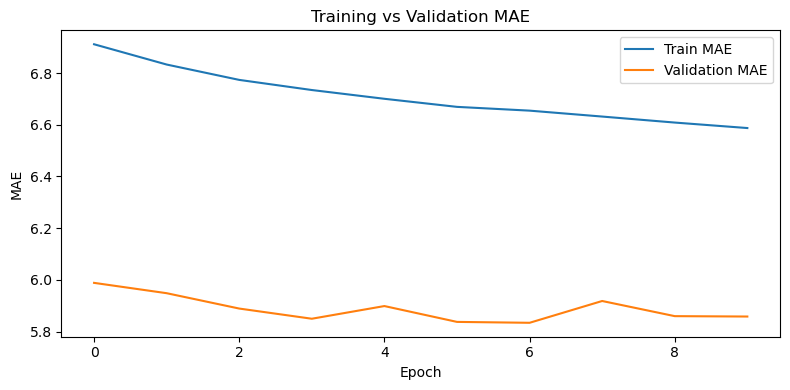

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Define model
model = Sequential([
    GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile with MAE loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=256,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nTrain RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f}")
print(f"Test  RMSE: {test_rmse:.4f} | MAE: {test_mae:.4f}")

# Plot training vs validation loss (MAE)
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

From GRU, We did find reasonable geralized results but the problem is we are using a sequence based approach 55 steps per session

In [42]:
df['time_bucket_new'] = pd.cut(
    df['seconds_in_bucket'],
    bins=[0, 300, 480, 540],   
    labels=[0, 1, 2],
    right=False                
).cat.codes

## Ensemble model - Already tested GRU , Looking for a treebased model and then do the ensemble using weightages

In [51]:
import numpy as np

# Collapse the sequence using mean, std, and last-timestep
X_train_flat = np.concatenate([
    X_train.mean(axis=1),
    X_train.std(axis=1),
    X_train[:, -1, :]
], axis=1)

X_test_flat = np.concatenate([
    X_test.mean(axis=1),
    X_test.std(axis=1),
    X_test[:, -1, :]
], axis=1)

print("X_train_flat:", X_train_flat.shape)
print("X_test_flat:", X_test_flat.shape)


X_train_flat: (75834, 72)
X_test_flat: (19398, 72)


In [53]:
from sklearn.metrics import make_scorer, mean_absolute_error

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


In [71]:
# from sklearn.model_selection import GridSearchCV
# import lightgbm as lgb

# lgb_params = {
#     'num_leaves': [15, 31],
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [5, 10],
#     'n_estimators': [100, 200]
# }

# lgb_model = lgb.LGBMRegressor(objective='mae', random_state=42)
# lgb_search = GridSearchCV(lgb_model, lgb_params, scoring=mae_scorer, cv=3, verbose=1)
# lgb_search.fit(X_train_flat, y_train)

# print(" Best LightGBM Params:", lgb_search.best_params_)

In [57]:
from catboost import CatBoostRegressor

cat_params = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'iterations': [100, 200]
}

cat_model = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
cat_search = GridSearchCV(cat_model, cat_params, scoring=mae_scorer, cv=3, verbose=1)
cat_search.fit(X_train_flat, y_train)

print("Best CatBoost Params:", cat_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best CatBoost Params: {'depth': 6, 'iterations': 200, 'learning_rate': 0.05}


### Transformers

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 6.9894 - val_loss: 6.1181 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - loss: 6.9108 - val_loss: 6.1071 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8935 - val_loss: 6.0777 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - loss: 6.9548 - val_loss: 6.0479 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - loss: 6.9273 - val_loss: 6.0139 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - loss: 6.9316 - val_loss: 6.0500 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8733 - val_loss: 6.0079 - learning_rate: 0.0010
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8288 - val_loss: 6.0145 - learning_rate: 0.0010
Epoch 9/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - loss: 6.8288 - val_loss: 5.9922 - learning_rate:

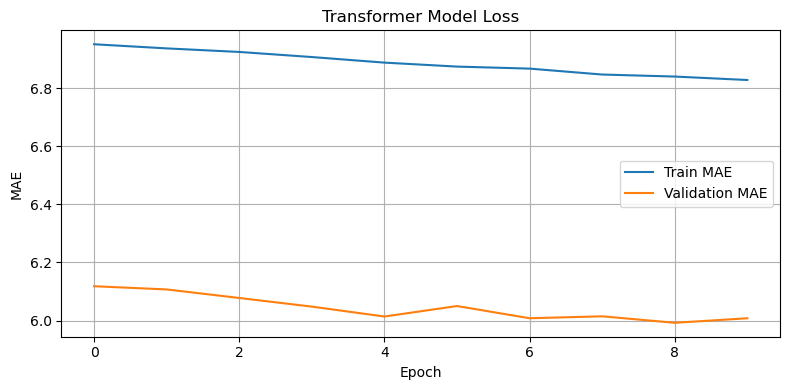

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, GlobalAveragePooling1D, MultiHeadAttention, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
seq_len = X_train.shape[1]
feature_dim = X_train.shape[2]
num_heads = 4
ff_dim = 128
drop_rate = 0.2

# Transformer block
def transformer_block(x):
    # Multi-head self attention
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=feature_dim)(x, x)
    attn_output = Dropout(drop_rate)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([x, attn_output]))
    
    # Feedforward
    ffn_output = Dense(ff_dim, activation='relu')(out1)
    ffn_output = Dense(feature_dim)(ffn_output)
    ffn_output = Dropout(drop_rate)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))
    return out2

# Model definition
inputs = Input(shape=(seq_len, feature_dim))
x = transformer_block(inputs)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mae')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f} | MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f} | MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")

# Plot MAE
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Transformer Model Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Stacking pipeline using CatBoost, GRU, and Transformer

In [73]:
df_early = df[df['seconds_in_bucket'] < 300].copy()
df_late = df[df['seconds_in_bucket'] >= 300].copy()

In [75]:
features = [col for col in df.columns if col not in ['row_id', 'target', 'stock_id', 'date_id', 'time_id']]

In [77]:
from catboost import CatBoostRegressor

cat_early = CatBoostRegressor(depth=6, iterations=200, learning_rate=0.05, loss_function='MAE', verbose=0)
cat_early.fit(df_early[features], df_early['target'])

cat_late = CatBoostRegressor(depth=6, iterations=200, learning_rate=0.05, loss_function='MAE', verbose=0)
cat_late.fit(df_late[features], df_late['target'])

In [79]:
#GRU already ran

In [81]:
model.save("gru_model.h5")

In [85]:
# Save model after training
model.save("transformer_model.h5")

In [96]:
df[df['is_late_auction'] == 0]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,wap_pct_change,time_bucket,wap_zscore_across_dates,rolling_std_wap_3,rolling_mean_wap_3,rolling_mean_imbalance_3,rolling_std_far_price_10,far_minus_reference,far_pct_dev,time_bucket_new
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.0,0.0,0.999812,...,0.003222,-1.241688,0.093974,0.000000,1.000000,3.180603e+06,0.0,-0.646019,-0.648627,0
191,0,0,10,1299772.70,1,1.000026,15261106.63,0.0,0.0,0.999812,...,-0.040021,-1.241688,0.029634,0.000076,0.999946,2.240188e+06,0.0,-0.646328,-0.648627,0
382,0,0,20,1299772.70,1,0.999919,15261106.63,0.0,0.0,0.999812,...,-0.060041,-1.241688,-0.000153,0.000081,0.999911,1.926716e+06,0.0,-0.646174,-0.648627,0
573,0,0,30,1299772.70,1,1.000133,15261106.63,0.0,0.0,1.000026,...,0.037256,-1.241688,0.144611,0.000128,0.999940,1.299773e+06,0.0,-0.646482,-0.648627,0
764,0,0,40,1218204.43,1,1.000455,15342674.90,0.0,0.0,1.000241,...,0.130149,-1.241688,0.282822,0.000238,1.000081,1.272583e+06,0.0,-0.646947,-0.648627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232179,199,480,250,7759010.62,-1,1.000859,10099786.52,0.0,0.0,1.000859,...,0.437655,-0.022173,0.455832,0.000030,1.001065,-8.191062e+06,0.0,-0.647529,-0.648627,0
5232379,199,480,260,7966297.16,-1,1.001177,10074592.17,0.0,0.0,1.001177,...,0.549366,-0.022173,0.584377,0.000163,1.001176,-8.082149e+06,0.0,-0.647988,-0.648627,0
5232579,199,480,270,8019205.31,-1,1.001177,10102494.92,0.0,0.0,1.001177,...,0.549366,-0.022173,0.584377,0.000161,1.001271,-7.914838e+06,0.0,-0.647988,-0.648627,0
5232779,199,480,280,139387.76,1,1.001494,19194853.72,0.0,0.0,1.001812,...,0.829245,-0.022173,0.906433,0.000404,1.001597,-5.282038e+06,0.0,-0.648445,-0.648627,0


In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import joblib
import os

# Load data (assumes you have already loaded 'df')
# For demonstration, placeholder is added.
# Replace this with actual loading if needed.

# Step 1: Basic preprocessing
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])
df = df.fillna(0)

# Step 2: Feature engineering (assumes you've already added these features)
# Placeholder: Add your engineered features here if not already in df

# Step 3: Pre/Post 300s Split
df_early = df[df['is_late_auction'] == 0].copy()
df_late = df[df['is_late_auction'] == 1].copy()

# Drop far and near prices for early part
drop_cols = ['near_price', 'far_price', 'delta_wap_near', 'delta_near_far', 'auction_deviation']
df_early.drop(columns=[col for col in drop_cols if col in df_early.columns], inplace=True)

# Step 4: Prepare 2D arrays
features_early = [col for col in df_early.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]
features_late = [col for col in df_late.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7688
[LightGBM] [Info] Number of data points in the train set: 2275020, number of used features: 33
[LightGBM] [Info] Start training from score -0.090003
Training until validation scores don't improve for 10 rounds
[50]	valid_0's l1: 6.00975
[100]	valid_0's l1: 5.87522
[150]	valid_0's l1: 5.81807
[200]	valid_0's l1: 5.78852
Did not meet early stopping. Best iteration is:
[199]	valid_0's l1: 5.78762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9220
[LightGBM] [Info] Number of data points in the train set: 1895850, number of used f

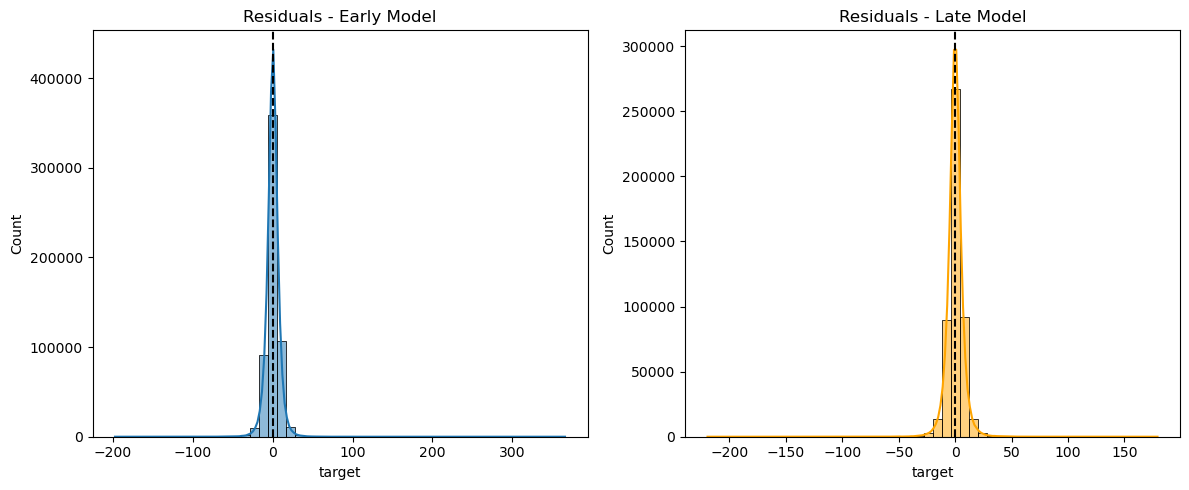

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocessing ---
df = df.sort_values(['stock_id', 'date_id', 'seconds_in_bucket'])
df = df.fillna(0)
df['is_late_auction'] = (df['seconds_in_bucket'] >= 300).astype(int)
df_early = df[df['is_late_auction'] == 0].copy()
df_late = df[df['is_late_auction'] == 1].copy()

drop_cols = ['near_price', 'far_price', 'delta_wap_near', 'delta_near_far', 'auction_deviation']
df_early.drop(columns=[col for col in drop_cols if col in df_early.columns], inplace=True)

features_early = [col for col in df_early.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]
features_late = [col for col in df_late.columns if col not in ['target', 'row_id', 'stock_id', 'date_id', 'seconds_in_bucket']]

X_early = df_early[features_early]
y_early = df_early['target']
X_late = df_late[features_late]
y_late = df_late['target']

scaler_early = StandardScaler()
X_early_scaled = scaler_early.fit_transform(X_early)
scaler_late = StandardScaler()
X_late_scaled = scaler_late.fit_transform(X_late)

unique_dates = sorted(df['date_id'].unique())
cutoff = int(len(unique_dates) * 0.8)
train_dates = unique_dates[:cutoff]
test_dates = unique_dates[cutoff:]

early_mask_train = df_early['date_id'].isin(train_dates)
early_mask_test = df_early['date_id'].isin(test_dates)
X_train_early = X_early_scaled[early_mask_train.values]
X_test_early = X_early_scaled[early_mask_test.values]
y_train_early = y_early[early_mask_train.values]
y_test_early = y_early[early_mask_test.values]

late_mask_train = df_late['date_id'].isin(train_dates)
late_mask_test = df_late['date_id'].isin(test_dates)
X_train_late = X_late_scaled[late_mask_train.values]
X_test_late = X_late_scaled[late_mask_test.values]
y_train_late = y_late[late_mask_train.values]
y_test_late = y_late[late_mask_test.values]

# --- Training ---
model_early = lgb.LGBMRegressor(objective='mae', learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=31, random_state=42)
model_early.fit(
    X_train_early, y_train_early,
    eval_set=[(X_test_early, y_test_early)],
    eval_metric='mae',
    callbacks=[log_evaluation(50), early_stopping(10)]
)

model_late = lgb.LGBMRegressor(objective='mae', learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=31, random_state=42)
model_late.fit(
    X_train_late, y_train_late,
    eval_set=[(X_test_late, y_test_late)],
    eval_metric='mae',
    callbacks=[log_evaluation(50), early_stopping(10)]
)

# --- Evaluation ---
y_train_pred_early = model_early.predict(X_train_early)
y_test_pred_early = model_early.predict(X_test_early)
y_train_pred_late = model_late.predict(X_train_late)
y_test_pred_late = model_late.predict(X_test_late)

print(f"Early - Train MAE: {mean_absolute_error(y_train_early, y_train_pred_early):.4f} | Test MAE: {mean_absolute_error(y_test_early, y_test_pred_early):.4f}")
print(f"Late  - Train MAE: {mean_absolute_error(y_train_late, y_train_pred_late):.4f} | Test MAE: {mean_absolute_error(y_test_late, y_test_pred_late):.4f}")

# --- Residual Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_test_early - y_test_pred_early, bins=50, kde=True)
plt.axvline(0, color='black', linestyle='--')
plt.title("Residuals - Early Model")

plt.subplot(1, 2, 2)
sns.histplot(y_test_late - y_test_pred_late, bins=50, kde=True, color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.title("Residuals - Late Model")

plt.tight_layout()
plt.show()


In [108]:
# Aggregate to session level using weighted average based on seconds
df_early['preds'] = model_early.predict(X_early_scaled)
df_late['preds'] = model_late.predict(X_late_scaled)

# Combine both sets
df_combined = pd.concat([df_early, df_late], axis=0)

# Reduce to 1 prediction per session
tree_session_preds = df_combined.groupby(['stock_id', 'date_id'])['preds'].mean().reset_index(name='tree_pred')